<a href="https://colab.research.google.com/github/Bhavit03/My_work/blob/main/emotionai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#IMPORTING LIBRARIES AND DATASETS
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
# from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/emotion ai/

/content/drive/My Drive/emotion ai


In [6]:
keyfacialdf=pd.read_csv('/content/drive/My Drive/emotion ai/data.csv')

In [7]:
keyfacialdf.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [8]:
keyfacialdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [9]:
keyfacialdf.shape

(2140, 31)

In [10]:
keyfacialdf.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [11]:
keyfacialdf['Image'].shape

(2140,)

In [12]:
keyfacialdf['Image'] = keyfacialdf['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [13]:
keyfacialdf['Image'][0].shape

(96, 96)

In [14]:
keyfacialdf.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


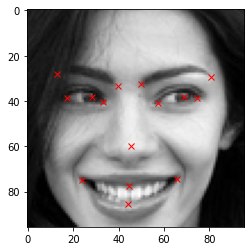

In [15]:
#IMAGE VISULIZATION
i=np.random.randint(1,len(keyfacialdf))
plt.imshow(keyfacialdf['Image'][i],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacialdf.loc[i][j-1],keyfacialdf.loc[i][j],'rx')

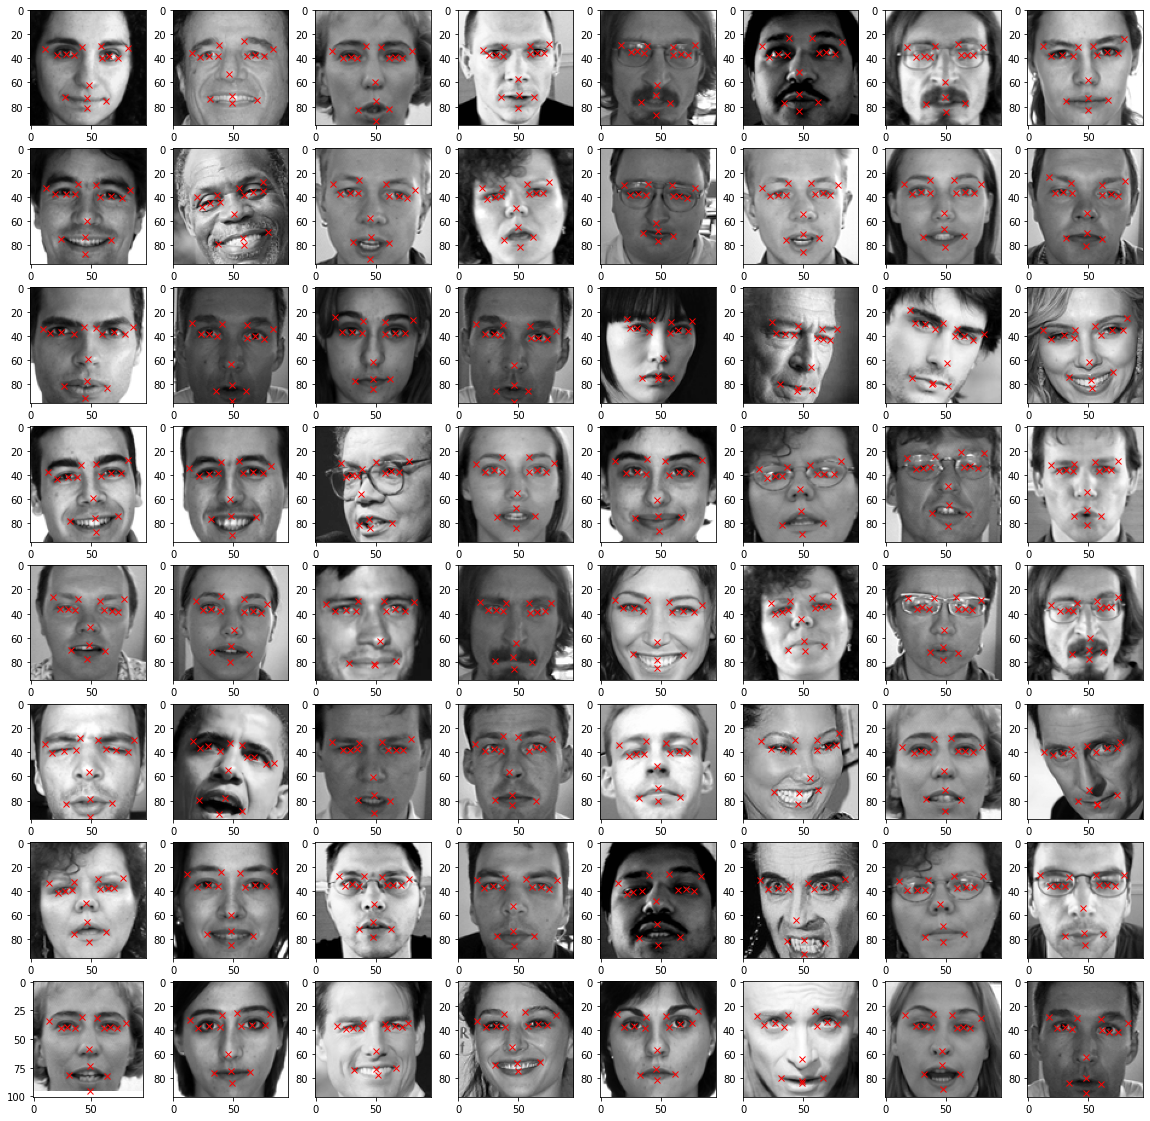

In [16]:
fig=plt.figure(figsize=(20,20))
for i in range(64):
  k=np.random.randint(1,len(keyfacialdf))
  ax=fig.add_subplot(8,8,i+1)
  img=plt.imshow(keyfacialdf['Image'][k],cmap='gray')
  for j in range(1,31,2):
    plt.plot(keyfacialdf.loc[k][j-1],keyfacialdf.loc[k][j],'rx')

In [17]:
#IMAGE AUGMENTATION
import copy
keyfacialdf_copy=copy.copy(keyfacialdf)


In [18]:
columns=keyfacialdf_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [19]:
#  HORIZONTAL FLIPPING
keyfacialdf_copy['Image']=keyfacialdf_copy['Image'].apply(lambda x:np.flip(x,axis=1))
# here x coor change and y coor stays the same
for i in range(len(columns)):
  if i%2==0:
    keyfacialdf_copy[columns[i]]=keyfacialdf_copy[columns[i]].apply(lambda x:96.-float(x))

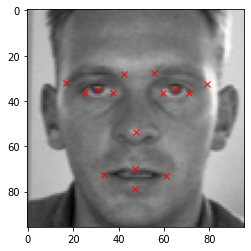

In [20]:
plt.imshow(keyfacialdf['Image'][2],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacialdf.loc[2][j-1],keyfacialdf.loc[2][j],'rx')

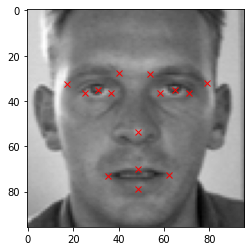

In [21]:
plt.imshow(keyfacialdf_copy['Image'][2],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacialdf_copy.loc[2][j-1],keyfacialdf_copy.loc[2][j],'rx')

In [22]:
augmented_df=np.concatenate((keyfacialdf,keyfacialdf_copy))


In [23]:
augmented_df.shape

(4280, 31)

In [24]:
#increasing the brightness
import random
keyfacialdf_copy=copy.copy(keyfacialdf)
keyfacialdf_copy['Image']=keyfacialdf_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2)*x,0.0,255.0))
augmented_df=np.concatenate((keyfacialdf_copy,augmented_df))
augmented_df.shape

(6420, 31)

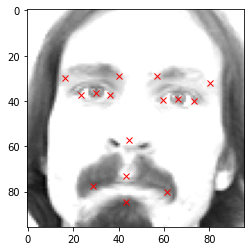

In [25]:
plt.imshow(keyfacialdf_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacialdf_copy.loc[0][j-1],keyfacialdf_copy.loc[0][j],'rx')

In [26]:
#vertical flipping
keyfacialdf_copy=copy.copy(keyfacialdf)
keyfacialdf_copy['Image']=keyfacialdf_copy['Image'].apply(lambda x:np.flip(x,axis=0))
for i in range(len(columns)):
  if i%2!=0:
    keyfacialdf_copy[columns[i]]=keyfacialdf_copy[columns[i]].apply(lambda x:96.-float(x))

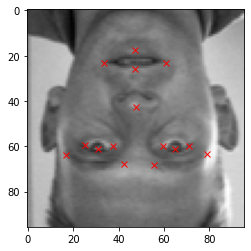

In [27]:
plt.imshow(keyfacialdf_copy['Image'][2],cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacialdf_copy.loc[2][j-1],keyfacialdf_copy.loc[2][j],'rx')

In [28]:
augmented_df=np.concatenate((keyfacialdf,keyfacialdf_copy))

In [29]:
#DATA NORMALIZATION AND TRAINING DATA PREPARATION
img=augmented_df[:,30]

In [30]:
img=img/255
X=np.empty((len(img),96,96,1))
for i in range(len(img)):
  X[i,]=np.expand_dims(img[i],axis=2)
X=np.asarray(X).astype(np.float32)
X.shape

(4280, 96, 96, 1)

In [31]:
y=augmented_df[:,:30]
y=np.asarray(y).astype(np.float32)
y.shape

(4280, 30)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [34]:
input_shape=(96,96,1)
X_input=Input(input_shape)

X=ZeroPadding2D((3,3))(X_input)

X=Conv2D(64,(7,7),strides=(2,2),name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
X=BatchNormalization(axis =3, name = 'batchnorm')(X)
X=MaxPooling2D((3,3),strides=(2,2))(X)

X=res_block(X,filter=[64,64,256],stage=2)

X=res_block(X,filter=[128,128,512],stage=3)

X=AveragePooling2D((2,2),name='average-pooling')(X)

X=Flatten()(X)
X=Dense(4096,activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(2048,activation='relu')(X)
X=Dropout(0.1)(X)
X=Dense(30,activation='relu')(X)


model1_facialkeypoints=Model(inputs=X_input,outputs=X)
model1_facialkeypoints.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batchnorm (BatchNormalization)  (None, 48, 48, 64)  256         ['conv1[0][0]']                  
                                                                                              

In [35]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model1_facialkeypoints.compile(optimizer ="adam" ,loss = "mean_squared_error", metrics = ['accuracy'])


In [36]:
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [37]:
history = model1_facialkeypoints.fit(X_train, y_train, batch_size = 32, epochs = 2, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/2
102/102 [==============================] - ETA: 0s - loss: 178.8668 - accuracy: 0.6233
Epoch 1: val_loss improved from inf to 1100.49854, saving model to FacialKeyPoints_weights.hdf5
102/102 [==============================] - 95s 905ms/step - loss: 178.8668 - accuracy: 0.6233 - val_loss: 1100.4985 - val_accuracy: 0.6105
Epoch 2/2
102/102 [==============================] - ETA: 0s - loss: 20.2487 - accuracy: 0.7700
Epoch 2: val_loss improved from 1100.49854 to 270.52115, saving model to FacialKeyPoints_weights.hdf5
102/102 [==============================] - 87s 856ms/step - loss: 20.2487 - accuracy: 0.7700 - val_loss: 270.5211 - val_accuracy: 0.6105


In [38]:
#saving model in json file
model_json = model1_facialkeypoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)

In [39]:
# loading model in json file
from keras.initializers import glorot_uniform
with open('FacialKeyPoints-model.json','r') as json_file:
  json_savedmodel=json_file.read()

model1_facialkeypoints=tf.keras.models.model_from_json(json_savedmodel)
model1_facialkeypoints.load_weights('FacialKeyPoints_weights.hdf5')
adam=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model1_facialkeypoints.compile(loss="mean_squared_error",optimizer=adam,metrics=['accuracy'])

In [40]:
result=model1_facialkeypoints.evaluate(X_test,y_test)
print("accuracy: {}".format(result[1]))

27/27 [==============================] - 5s 171ms/step - loss: 280.1509 - accuracy: 0.6203
accuracy: 0.6203271150588989


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<ipython-input-42-dde8681294e5>:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train_loss','val_loss'],loc='upper_right')


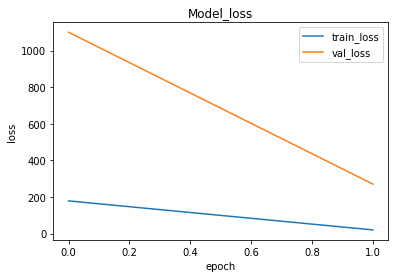

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'],loc='upper_right')
plt.show()

In [43]:
#now comes the task of facial expressions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
%cd /content/drive/My Drive/emotion ai/

/content/drive/My Drive/emotion ai


In [45]:
facedata_df=pd.read_csv('icml_face_data.csv')

In [46]:
facedata_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [47]:
facedata_df[' pixels'][0]  # given in string format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [68]:
def string2array(x):
  return np.array(x.split(' ')).reshape(48,48).astype('float32')

In [72]:
#resizing from 48,48 to 96,96
def resize(x):
  img=x.reshape(48,48,1)
  return cv2.resize(img,dsize=(96,96),interpolation=cv2.INTER_CUBIC)

In [73]:
facedata_df[' pixels']=facedata_df[' pixels'].apply(lambda x:string2array(x))


AttributeError: ignored

In [74]:
facedata_df[' pixels']=facedata_df[' pixels'].apply(lambda x:resize(x))

In [75]:
facedata_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [76]:
facedata_df.shape

(24568, 2)

In [77]:
facedata_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [78]:
label_to_text={0:'anger',1:'disgust',2:'sad',3:'happiness',4:'surprise'}

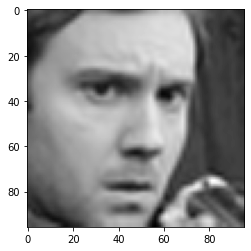

In [79]:
plt.imshow(facedata_df[' pixels'][0],cmap='gray')

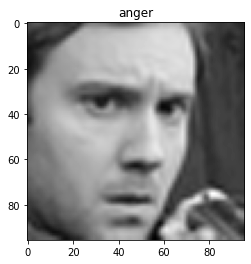

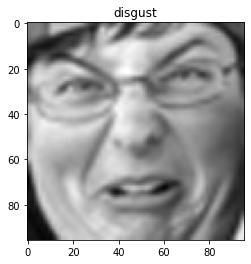

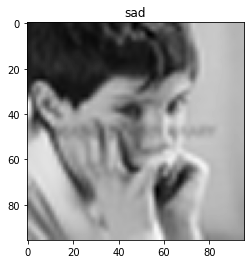

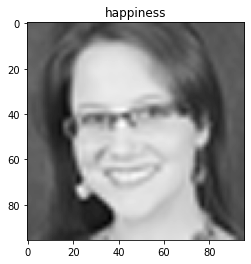

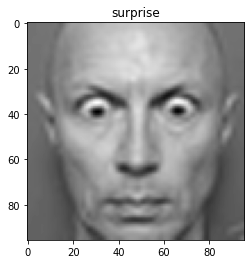

In [80]:
# image visulization and label plotting
emotions=[0,1,2,3,4]

for i in emotions:
  data=facedata_df[facedata_df['emotion']==i][:1]
  img=data[' pixels'].item()
  img=img.reshape(96,96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img,cmap='gray')

In [81]:
facedata_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

In [82]:
facedata_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

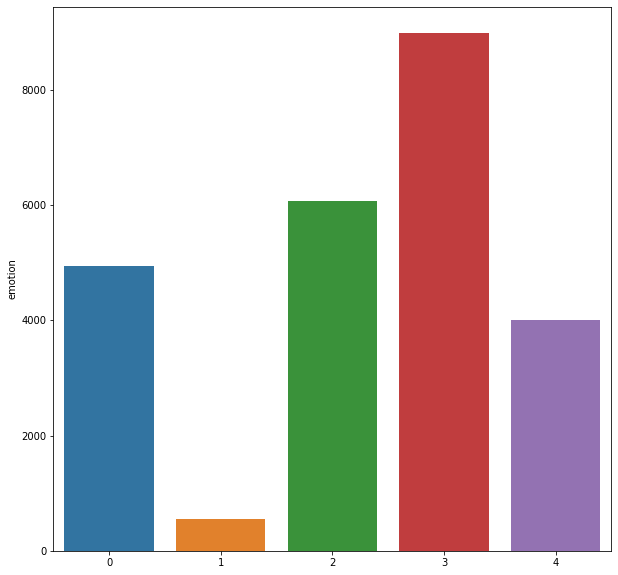

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(x=facedata_df.emotion.value_counts().index,y=facedata_df.emotion.value_counts())

In [1]:
# as data in emotion 1 is less we will perform img augmentation to make it balanced dataset
from keras.utils import to_categorical
X2=facedata_df[' pixels']
y2=to_categorical(facedata_df['emotion'])

NameError: ignored

In [85]:
X2.shape

(24568,)

In [89]:
X2=np.stack(X2,axis=0)
np.reshape(X2,(96,96,1))

print(X2.shape,y2.shape)

ValueError: ignored

In [87]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.1,shuffle=True)
X2_val,X2_test,y2_val,y2_test=train_test_split(X2_test,y2_test,test_size=0.5,shuffle=True)


In [88]:
print(X2_train.shape,X2_test.shape,X2_val.shape)

(22111, 96, 96) (1229, 96, 96) (1228, 96, 96)


In [ ]:
X2_train=X2_train/255
X2_test=X2_test/255
X2_val=X2_val/255

In [ ]:
# we will here use image data generator to perform data augmentation
traindatagen=ImageDataGenerator(
  rotation_range=15,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  fill_mode="nearest"
)

In [ ]:
# CREATING THE FACIAL EXPRESSION RECOGNITION MODEL
input_shape=(96,96,1)

X_input=Input(input_shape)
X=ZeroPadding2D((3,3))(X_input)

X=Conv2D(64,(7,7),strides=(2,2),name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
X=BatchNormalization(axis=3,name='batchnorm1')(X)
X=Activation('relu')(X)
X=MaxPool2D((3,3),strides=(2,2))(X)

X=res_block(X,filter=[64,64,256],stage=2)

X=res_block(X,filter=[128,128,512],stage=3)

X=AveragePooling2D((4,4),name='avgpool')(X)

X=Flatten()(X)
X=Dense(5,activation='softmax',kernel_initializer=glorot_uniform(seed=0))(X)

model2_emotion=Model(inputs=X_input,outputs=X,name='Resnet18')
model2_emotion.summary()

In [ ]:
model2_emotion.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['Accuracy'])

In [ ]:
earlystoping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
checkpointer=ModelCheckpoint(filepath="FacialExpression_weights.hdf5",verbose=1,save_best_only=True)

In [ ]:
history=model2_emotion.fit(traindatagen.flow(X2_train,y2_train,batch_size=64),
                          validation_data=(X_val,y_val),
                           steps_per_epoch=len(X2_train)//64,
                           epochs=2,
                           callbacks=[checkpointer,earlystoping])
